# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
# You have to include the full link to the csv file containing your dataset
credit_card = pd.read_csv("Credit_Card.csv")

In [3]:
credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
credit_card.info()
# 24 features in total, each contains 30000 data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
credit_card.describe()
# the mean for LIMIT_BAL = 1500, min =1, and max = 30000
# the mean for AGE = 25 years old, min = 21, and max = 79
# PAY_AMT average is around 5k

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
credit_card.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

# TASK #3: VISUALIZE DATASET

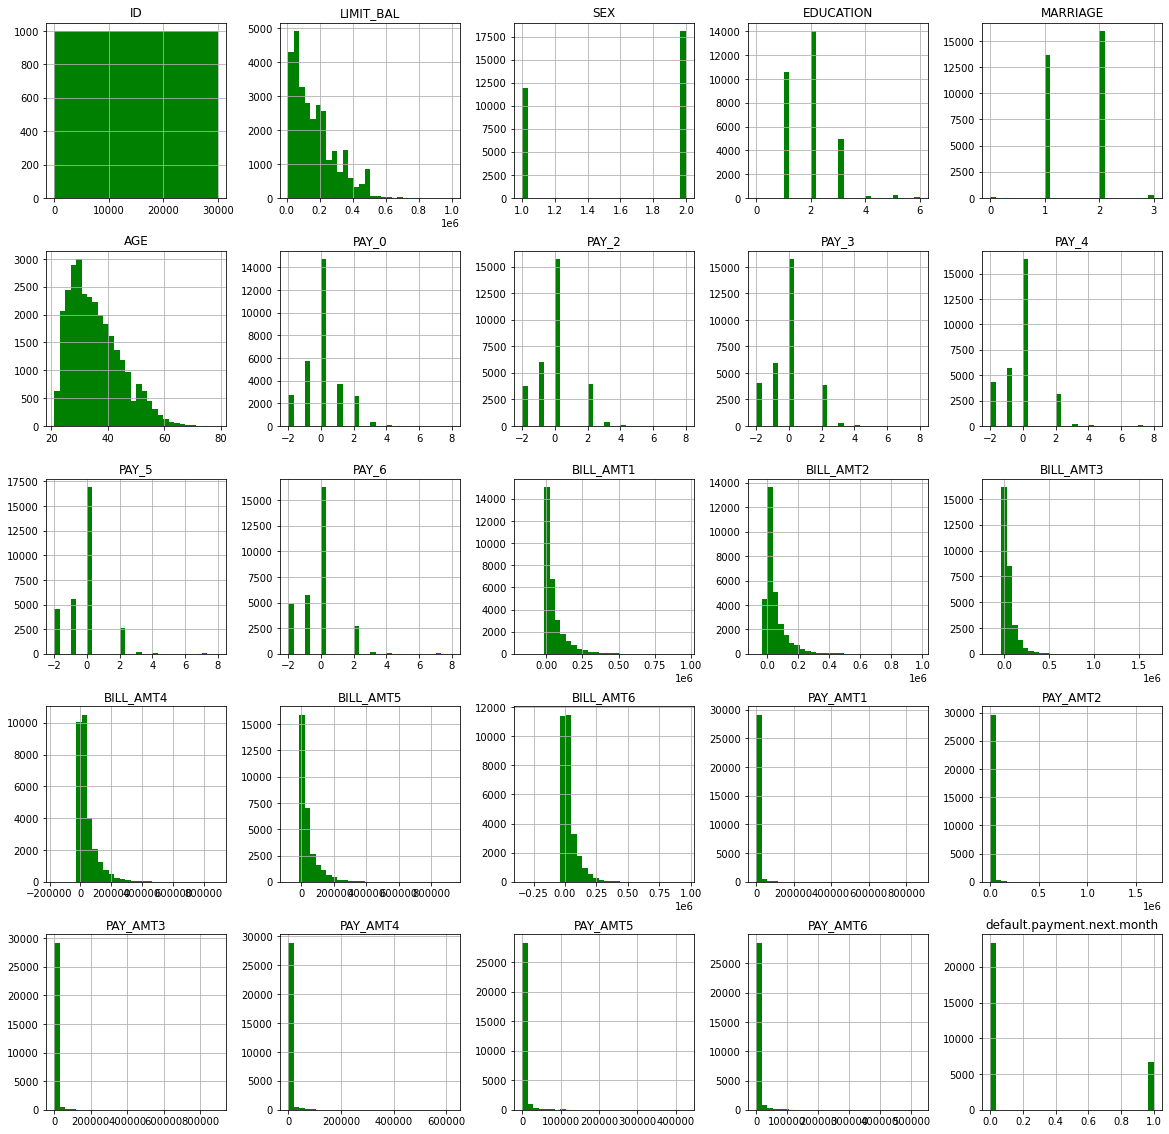

In [7]:
credit_card.hist(bins = 30, figsize = (20,20), color = "g")

In [48]:
sns.countplot(credit_card['default.payment.next.month'])
plt.show()

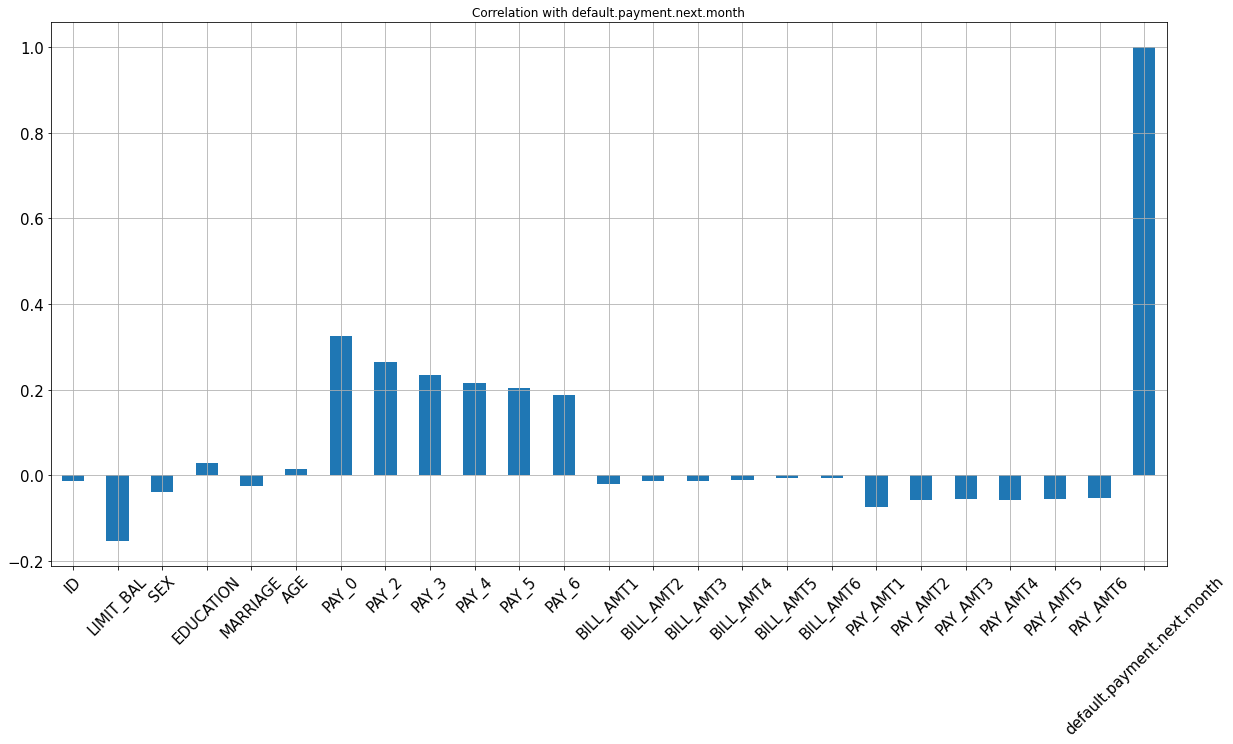

In [49]:
credit_card.corrwith(credit_card['default.payment.next.month']).plot.bar(figsize=(20,10),
                                               title="Correlation with default.payment.next.month",
                                               fontsize=15,
                                               rot=45,
                                               grid=True)

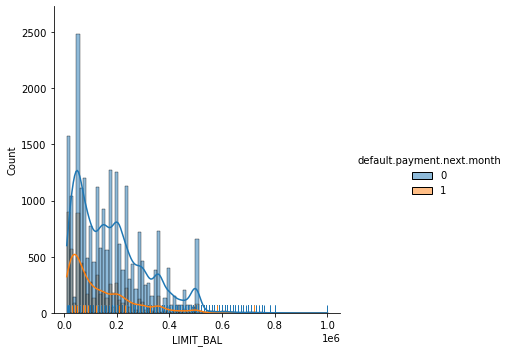

In [50]:
sns.displot(x = 'LIMIT_BAL', data = credit_card, hue = 'default.payment.next.month', kde = True, rug=True)
plt.show()

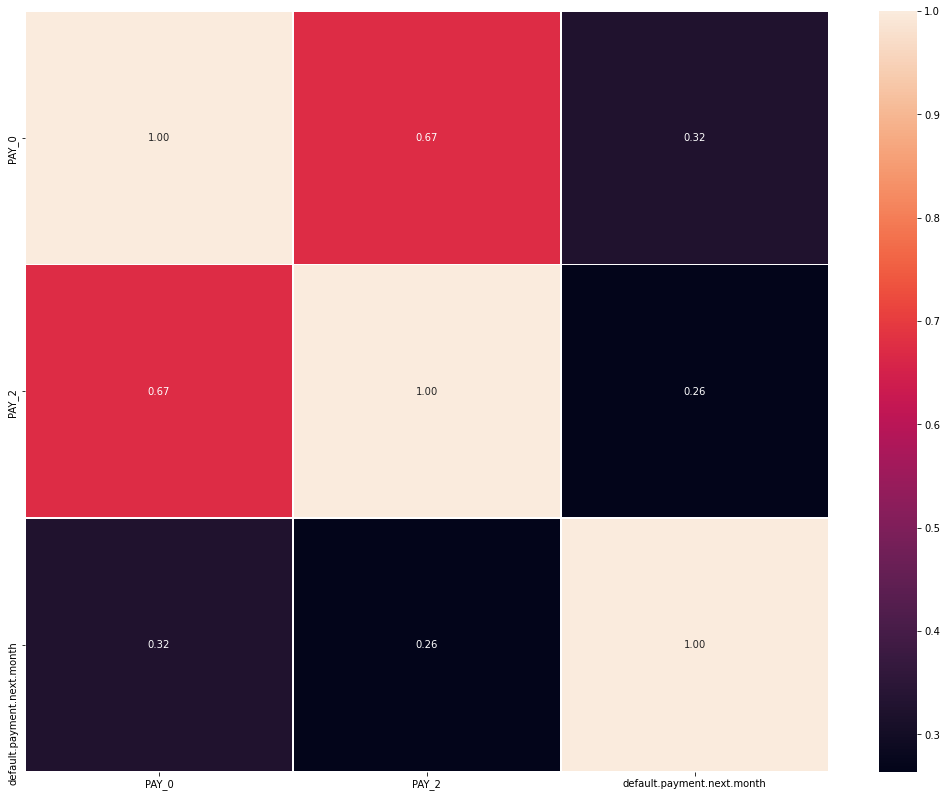

In [8]:
treshold = 0.25
corr_matrix = credit_card.corr()
filtre = np.abs(corr_matrix['default.payment.next.month'])>treshold
corr_feature = corr_matrix.columns[filtre].tolist()
corr=credit_card[corr_feature].corr()

plt.figure(figsize=(18,14))
sns.heatmap(corr, annot=True, linecolor="w", linewidths=.5, fmt=".2f")
plt.show()

In [9]:
col = ['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION', 'MARRIAGE']

In [10]:
def show_categoric_bar_plot(dataframe, columns):
    for column in columns:
        plt.figure(figsize=[10,4])
        sns.countplot(x = column, data = dataframe)

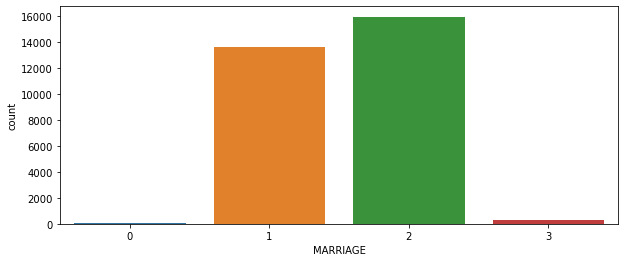

In [54]:
show_categoric_bar_plot(credit_card, col)

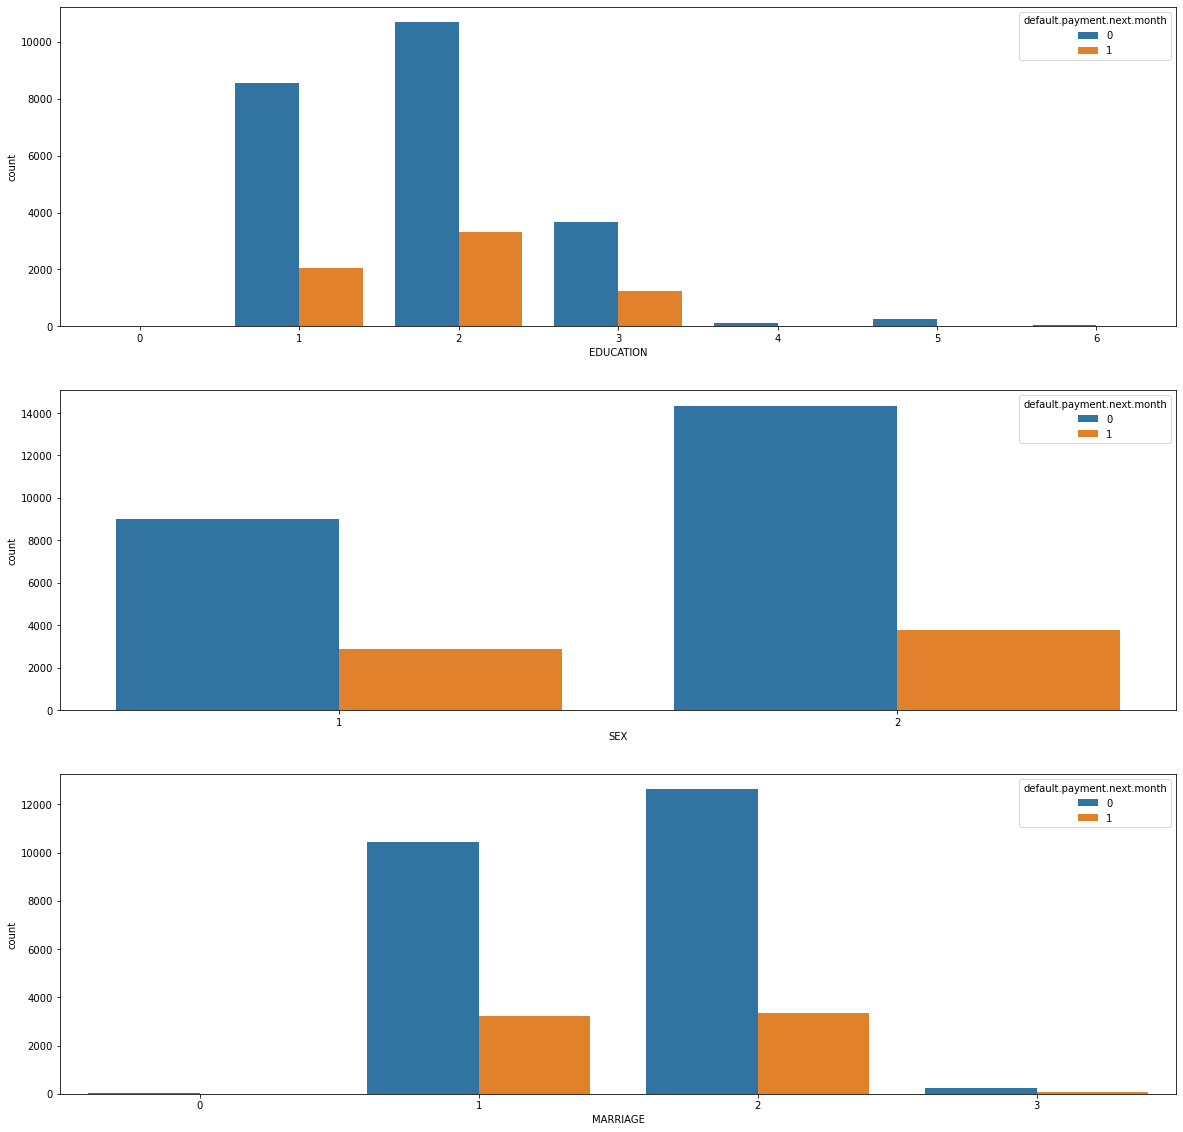

In [57]:
plt.figure(figsize=[20,20])
plt.subplot(311)
sns.countplot(x = 'EDUCATION', hue = 'default.payment.next.month', data = credit_card)
plt.subplot(312)
sns.countplot(x = 'SEX', hue = 'default.payment.next.month', data = credit_card)
plt.subplot(313)
sns.countplot(x = 'MARRIAGE', hue = 'default.payment.next.month', data = credit_card)

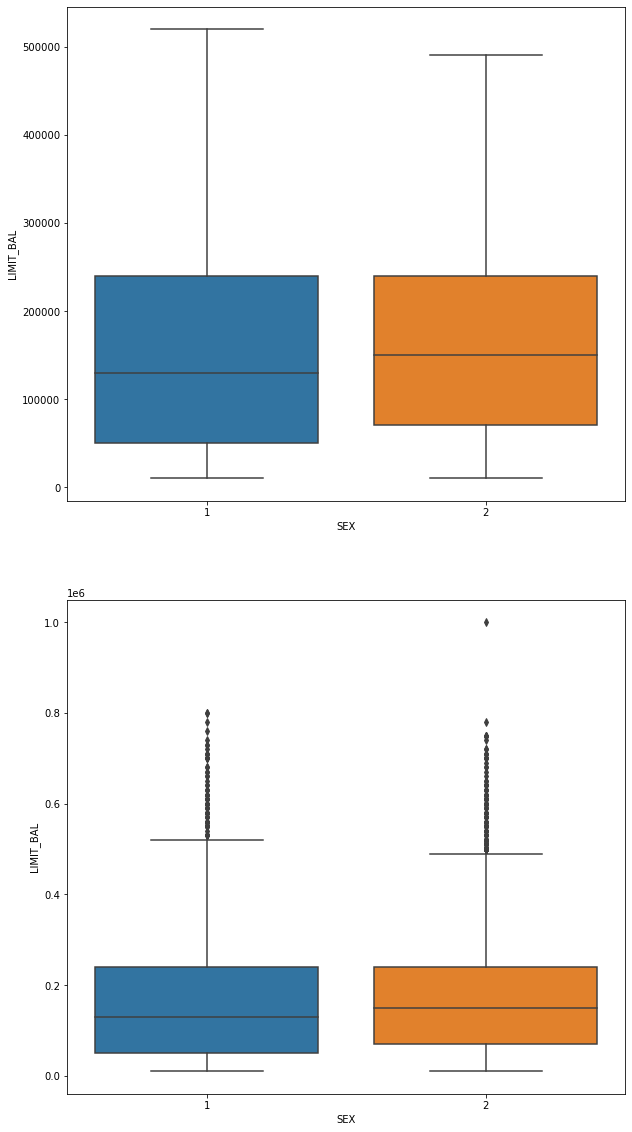

In [58]:
# Let's see the impact of sex on the limit balance 

plt.figure(figsize=[10,20])
plt.subplot(211)
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data = credit_card, showfliers = False)
plt.subplot(212)
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data = credit_card)

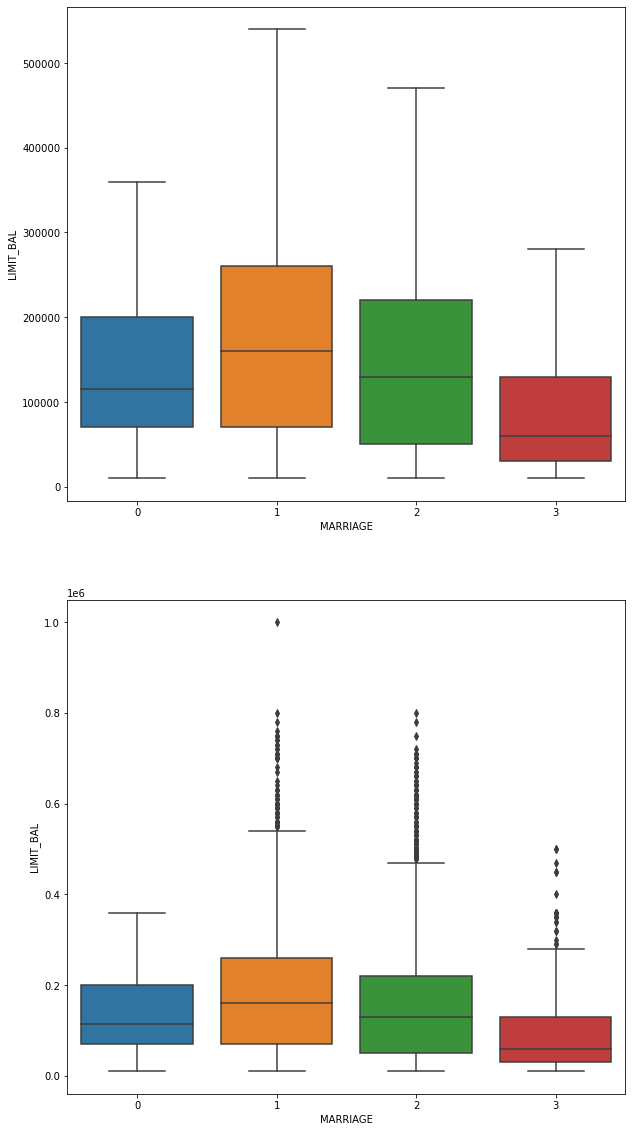

In [59]:
plt.figure(figsize=[10,20])
plt.subplot(211)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = credit_card, showfliers = False)
plt.subplot(212)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = credit_card)

# TASK #4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [11]:
# Let's drop the ID column
credit_card.drop(['ID'], axis=1, inplace=True)

In [12]:
credit_card = pd.get_dummies(credit_card, columns=['EDUCATION', 'MARRIAGE'])

In [13]:
credit_card.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,2,24,2,2,-1,-1,-2,-2,3913.0,...,0,1,0,0,0,0,0,1,0,0
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,...,0,1,0,0,0,0,0,0,1,0
2,90000.0,2,34,0,0,0,0,0,0,29239.0,...,0,1,0,0,0,0,0,0,1,0
3,50000.0,2,37,0,0,0,0,0,0,46990.0,...,0,1,0,0,0,0,0,1,0,0
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,...,0,1,0,0,0,0,0,1,0,0


In [14]:
x = credit_card.drop(columns=['default.payment.next.month'], axis = 1)
y = credit_card['default.payment.next.month']

In [15]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.30)

In [66]:
x_train.shape

(21000, 32)

In [67]:
x_test.shape

(9000, 32)

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND XGBOOST ALGORITHM

![alt text](https://drive.google.com/uc?id=1jFH01bj3HFgojFZoAf4lHPRo5t0Mmktx)

![alt text](https://drive.google.com/uc?id=16K75Is5UOP-YQqneIR0yUpiR-Q7K5hfJ)

![alt text](https://drive.google.com/uc?id=1JAfjOhzUMsfJOvcOzPvMMYQN56JHXW3R)

![alt text](https://drive.google.com/uc?id=1dn61Jz_zGpKv7VTLQvLbp_0S1XwP9X6W)

![alt text](https://drive.google.com/uc?id=1qW-p617bJnRWzh-fWCQfXWyHF4F6vFzD)

![alt text](https://drive.google.com/uc?id=1vywPBzlXqqrcg1K_rqEfeAjZAXjxXCCk)

![alt text](https://drive.google.com/uc?id=1ZRG6Uo7r6W9DBFO5tDh90-xA57ajnnnn)

![alt text](https://drive.google.com/uc?id=19t3DHRXvoz6o7-eG90L-4jHe0cfBdH_x)

![alt text](https://drive.google.com/uc?id=15xcYP8mOOEgUnR0rIXSovoIqUY3ySJRb)

![alt text](https://drive.google.com/uc?id=1Q3UzxrlwbH9jZkl6tEDO2L5AOanS-kqD)

![alt text](https://drive.google.com/uc?id=1rDFPOeoX8pM60ZxnIg-K66IjbqRHHnPG)

# TASK #6: UNDERSTAND XGBOOST ALGORITHM KEY STEPS

![alt text](https://drive.google.com/uc?id=13wDmGpYDA0c-lewGJWXpjVJcPav381Lh)

![alt text](https://drive.google.com/uc?id=1Pxbku6A5FvJsvCsVl6sKk6N3PHg5_IRI)

![alt text](https://drive.google.com/uc?id=1Q6-oFxjZEAU4qUFzPXj3hKXQMWQlPx99)

![alt text](https://drive.google.com/uc?id=1djdQCC99-bZBRB7txj_jT68a8-IHixl6)

![alt text](https://drive.google.com/uc?id=1cStZqzA9ez-EfvSoM8S_1xEMtYBjRMOB)

![alt text](https://drive.google.com/uc?id=1IF2iJ_uquTRJ89lA5PIEX0WfF42ONIwt)

![alt text](https://drive.google.com/uc?id=1FoknM1AqDlDa4xdLyshs0KNE4kA1nCLY)

![alt text](https://drive.google.com/uc?id=1ZJ5vqYAur2p9G6bZkO9XjPbeSME1k3Wo)

![alt text](https://drive.google.com/uc?id=1XMBkju1Ej6RXm-lEvVKwuiMklnUv6WWT)

![alt text](https://drive.google.com/uc?id=1jINWBW2OT1BPLK6As0LyYESdcGcnbrYM)

![alt text](https://drive.google.com/uc?id=1jgF3Q2FUTbNpAC-d5EDXOVAa7xnI68mK)

# TASK #7: TRAIN AND EVALUATE AN XGBOOST CLASSIFIER (LOCALLY)

In [18]:
!pip install xgboost

In [19]:
# Train an XGBoost regressor model 

import xgboost as xgb


model = xgb.XGBClassifier(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
y_pred = model.predict(x_test)

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 81.17777777777778 %


In [23]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[6640 1314]
 [ 380  666]]


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7020
           1       0.64      0.34      0.44      1980

    accuracy                           0.81      9000
   macro avg       0.74      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000



# TASK #8: OPTIMIZE XGBOOST HYPERPARAMETERS BY PERFORMING GRID SEARCH

In [25]:
param_grid = {
        'gamma': [0.5, 1, 5],   # regularization parameter 
        'subsample': [0.6, 0.8, 1.0], # % of rows taken to build each tree
        'colsample_bytree': [0.6, 0.8, 1.0], # number of columns used by each tree
        'max_depth': [3, 4, 5] # depth of each tree
        }

In [26]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic')
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xgb_model, param_grid, refit = True, verbose = 4)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6; total time=   1.3s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6; total time=   1.2s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6; total time=   1.2s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6; total time=   2.2s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6; total time=   2.4s
[CV 1/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8; total time=   1.2s
[CV 2/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8; total time=   1.2s
[CV 3/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8; total time=   1.1s
[CV 4/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8; total time=   1.2s
[CV 5/5] END colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8; total time=   1.2s
[CV 1/5]

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [31]:
y_predict_optim = grid.predict(x_test)

In [32]:
y_predict_optim

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
# Testing Set Performance
cm = confusion_matrix(y_predict_optim, y_test)
print(cm)

[[6693 1349]
 [ 327  631]]


In [34]:
print(classification_report(y_predict_optim, y_test))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      8042
           1       0.32      0.66      0.43       958

    accuracy                           0.81      9000
   macro avg       0.64      0.75      0.66      9000
weighted avg       0.89      0.81      0.84      9000



In [35]:

print("Accuracy {} %".format( 100 * accuracy_score(y_predict_optim, y_test)))

Accuracy 81.37777777777778 %
